<img src=https://i.postimg.cc/rpmVRsXQ/image.png, width=600>

🚢 타이타닉: 데이터로 재구성하는 '불침함'의 비극
1. 배경: 역사상 가장 유명한 해난 사고
타이타닉호는 화이트 스타 라인이 운영한 영국의 호화 여객선으로, 1912년 4월 15일 영국 사우샘프턴에서 미국 뉴욕으로 향하던 첫 항해 중 빙산과 충돌하여 북대서양에서 침몰했습니다. 당시 승선했던 약 2,224명의 승객과 승무원 중 1,500명 이상이 목숨을 잃었으며, 이는 평시 발생한 해난 사고 중 역사상 가장 치명적인 사고로 기록되어 있습니다.

2. '침몰하지 않는 배'의 역설
타이타닉은 수밀 구획과 원격 작동 수밀 문 등 당대 최고의 첨단 안전 기술을 갖추어 '침몰하지 않는 배(Unsinkable)'라는 명성을 얻었습니다. 이 배에는 세계적인 부호들부터 미국과 캐나다에서 새로운 삶을 꿈꾸던 수백 명의 유럽 이민자들까지 다양한 계층의 사람들이 함께 탑승하고 있었습니다.

    하지만 비극은 안전 설비의 부족에서 심화되었습니다. 타이타닉은 이론적으로 총 48척의 구명정을 실을 수 있는 설비를 갖추었음에도 불구하고, 실제로는 단 20척만을 실었습니다. 이는 당시의 해상 안전 규정에는 부합했으나, 전체 승선 인원의 약 절반, 전체 수용 능력의 3분의 1 수준에 불과했습니다. 설상가상으로 배가 침몰할 때 내려진 구명정들 중 많은 수가 정원을 다 채우지 못한 채 떠나갔습니다.

3. 분석의 목적

    본 노트북에서는 생존자와 사망자의 데이터를 통해 '생존'이라는 결과에 영향을 미친 결정적인 요인들을 탐색합니다.

    사회 경제적 지위와 생존: 객실 등급(Pclass)과 운임(Fare)이 생존 확률에 어떤 영향을 미쳤는가?

    "여성과 아이 먼저": 성별(Sex)과 연령(Age)이 생존의 핵심 열쇠였는가?

    데이터의 시각화: 복잡한 인적 기록 속에 숨겨진 상관관계를 다양한 차트를 통해 직관적으로 도출합니다.

```
"비극은 기록으로 남았지만, 데이터는 그날의 보이지 않는 질서를 말해줍니다."
```

## 1. 데이터 프레임 불러오기

In [48]:
# 코드 1. 타이타닉 엑셀 파일에서 데이터 프레임 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.display.max_rows = 6 # 6행까지만 출력
pd.options.display.float_format = '{:.3f}'.format # 소수점 셋째 자리 출력

url = 'https://github.com/panda-kim/book1/blob/main/05titanic.xlsx?raw=true'
df = pd.read_excel(url)
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.000,0,0,370376,7.750,NaN,Q


## 🔍 타이타닉 데이터셋 컬럼 정의 (Data Dictionary)

본 데이터셋은 타이타닉호 승객들의 신상 정보와 생존 여부를 담고 있으며, 각 컬럼의 상세 의미는 다음과 같습니다.

### 1. 주요 목표 변수 (Target Variable)
* **Survived**: 생존 여부 (0 = 사망, 1 = 생존)

### 2. 승객 인적 사항
* **PassengerId**: 승객 고유 식별 번호
* **Name**: 승객 이름
* **Gender**: 승객 성별 (male, female)
* **Age**: 승객 나이

### 3. 사회 경제적 지위 및 티켓 정보
* **Pclass**: 객실 등급 (1 = 1등석, 2 = 2등석, 3 = 3등석)
* **Ticket**: 티켓 번호
* **Fare**: 티켓 요금 (지불한 금액)
* **Cabin**: 객실 번호
* **Embarked**: 탑승 항구 (S = Southampton, C = Cherbourg, Q = Queenstown)

### 4. 가족 동반 정보
* **SibSp (Siblings / Spouses)**: 함께 탑승한 형제, 자매 또는 배우자의 수
* **Parch (Parents / Children)**: 함께 탑승한 부모 또는 자녀의 수

---


## 2. 데이터 기본 정보 확인

In [49]:
# 코드 2. info 함수로 데이터 프레임 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [50]:
# 코드 3. 각 열마다 결측값 확인하기
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
...,...
Fare,0
Cabin,687
Embarked,2


<Axes: >

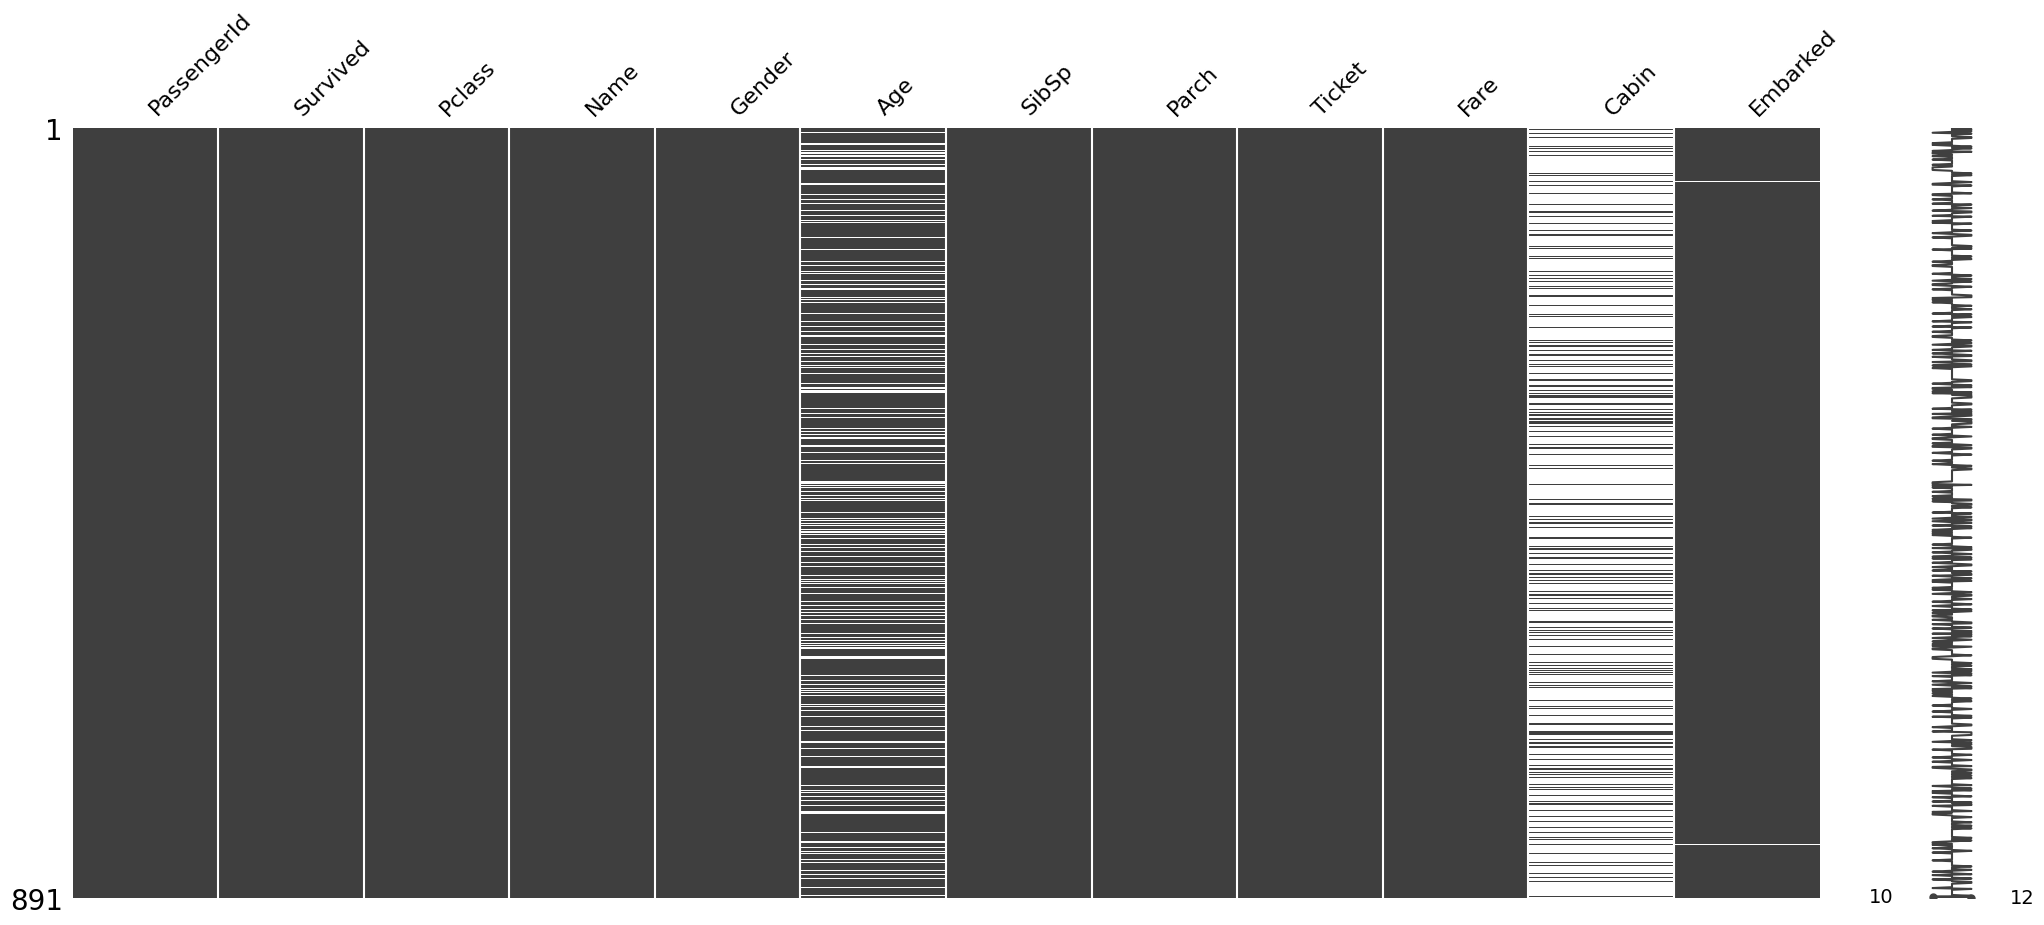

In [51]:
# 코드 4. msno 라이브러리로 각 열의 결측값 시각화하기
import missingno as msno
msno.matrix(df)

In [52]:
# 코드 5. df의 기술 통계 확인하기
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000,891.000,891.000,714.000,891.000,891.000,891.000
mean,446.000,0.384,2.309,29.699,0.523,0.382,32.204
std,257.354,0.487,0.836,14.526,1.103,0.806,49.693
...,...,...,...,...,...,...,...
50%,446.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,668.500,1.000,3.000,38.000,1.000,0.000,31.000
max,891.000,1.000,3.000,80.000,8.000,6.000,512.329


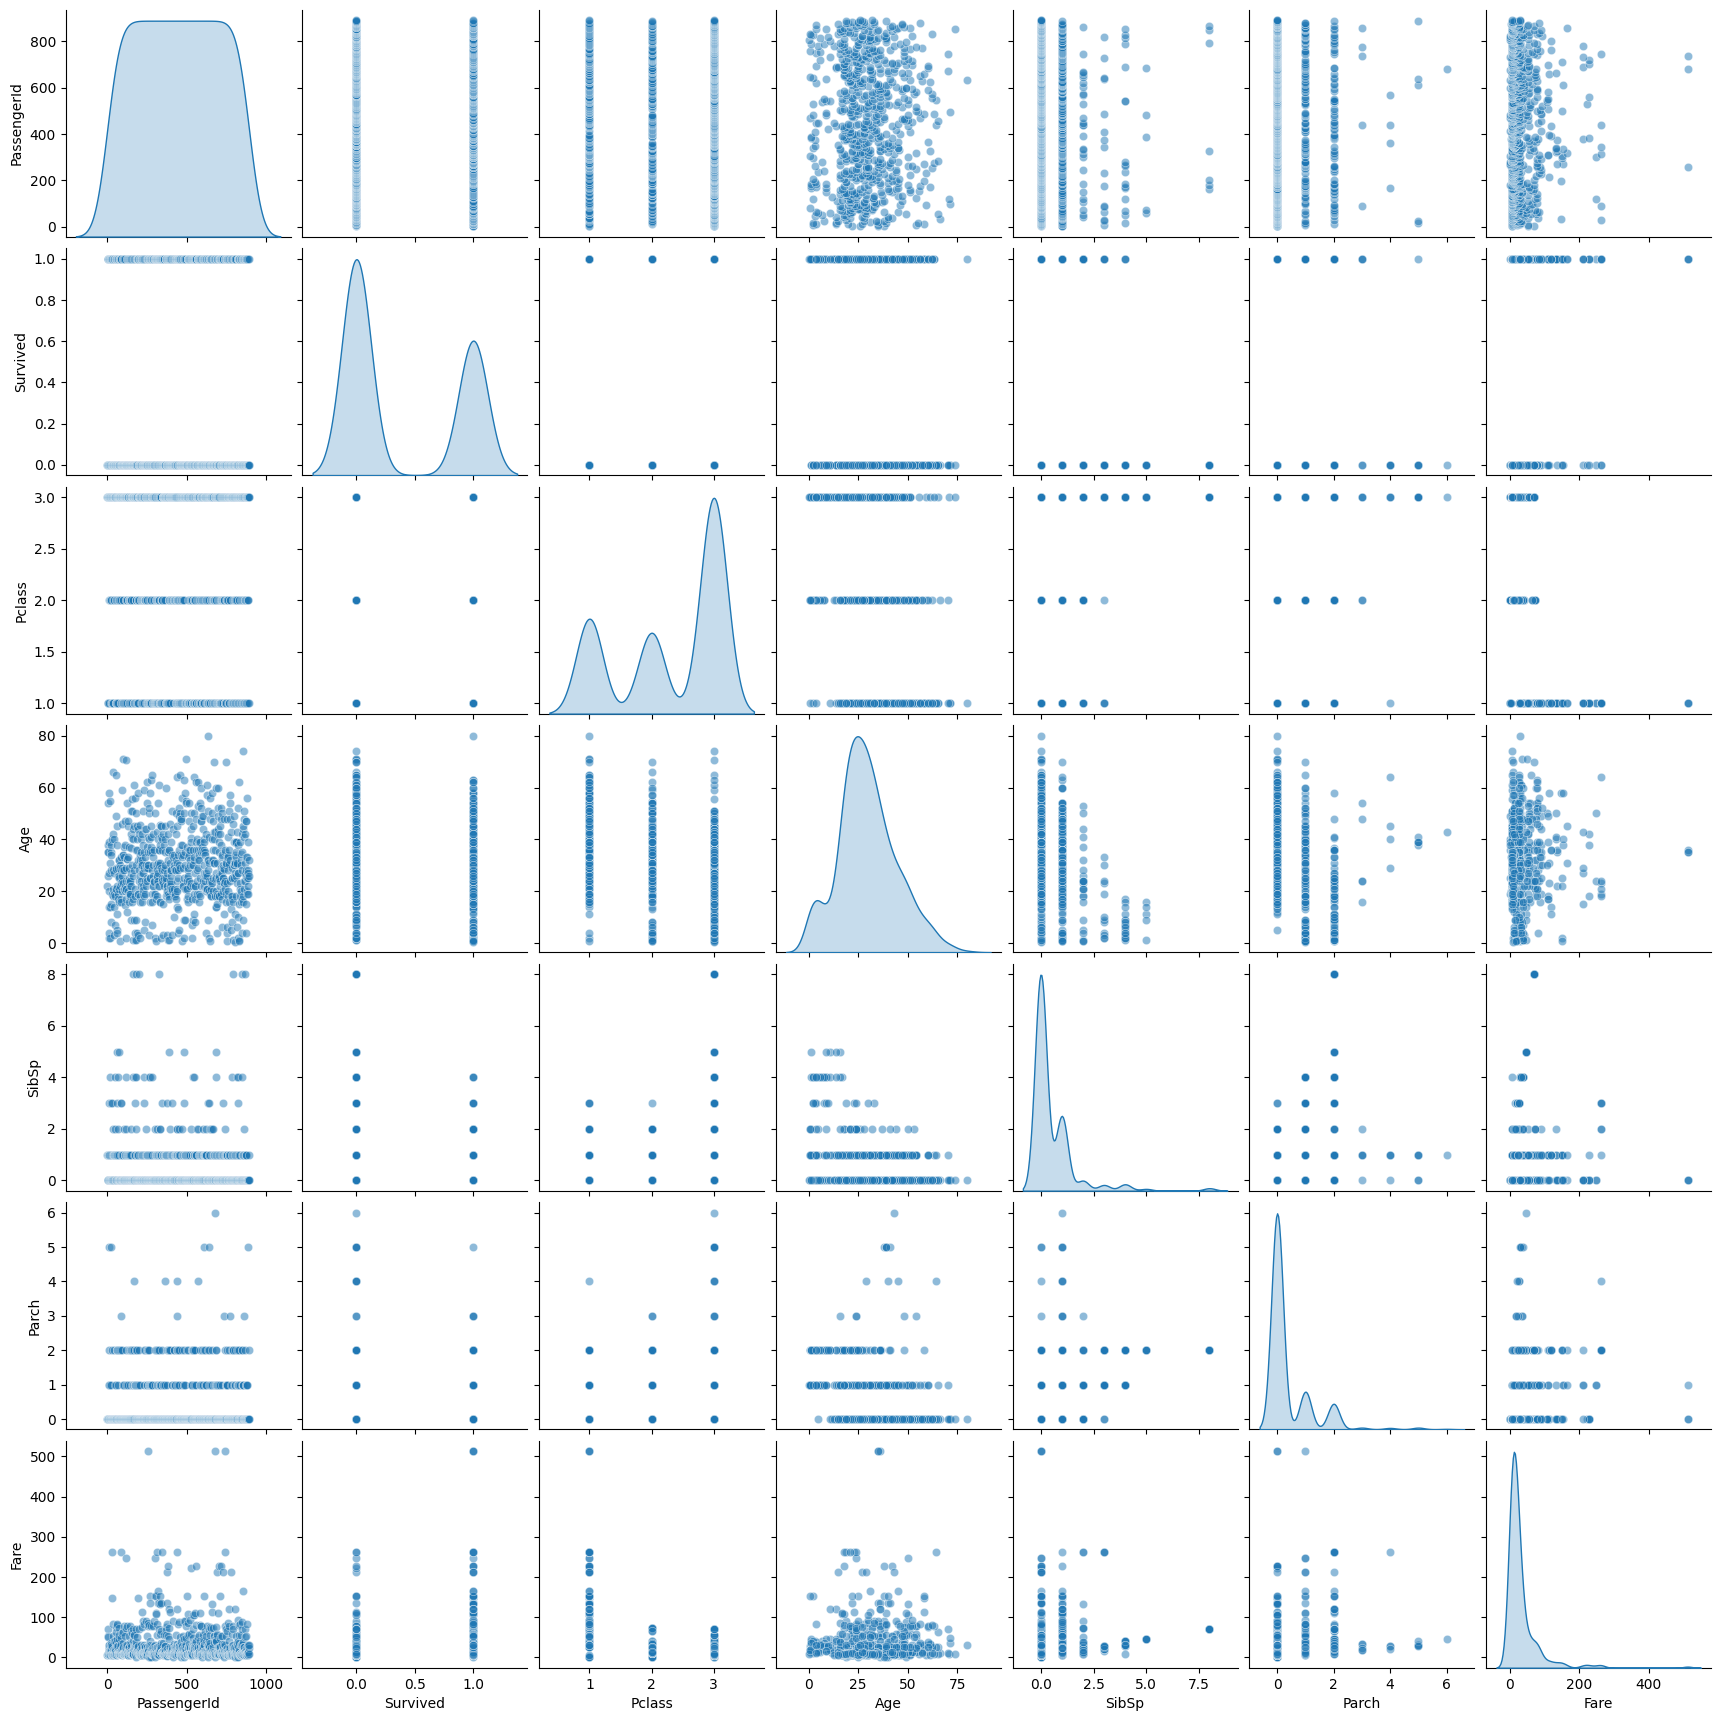

In [53]:
# 코드 6. pair plot 생성
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.5})

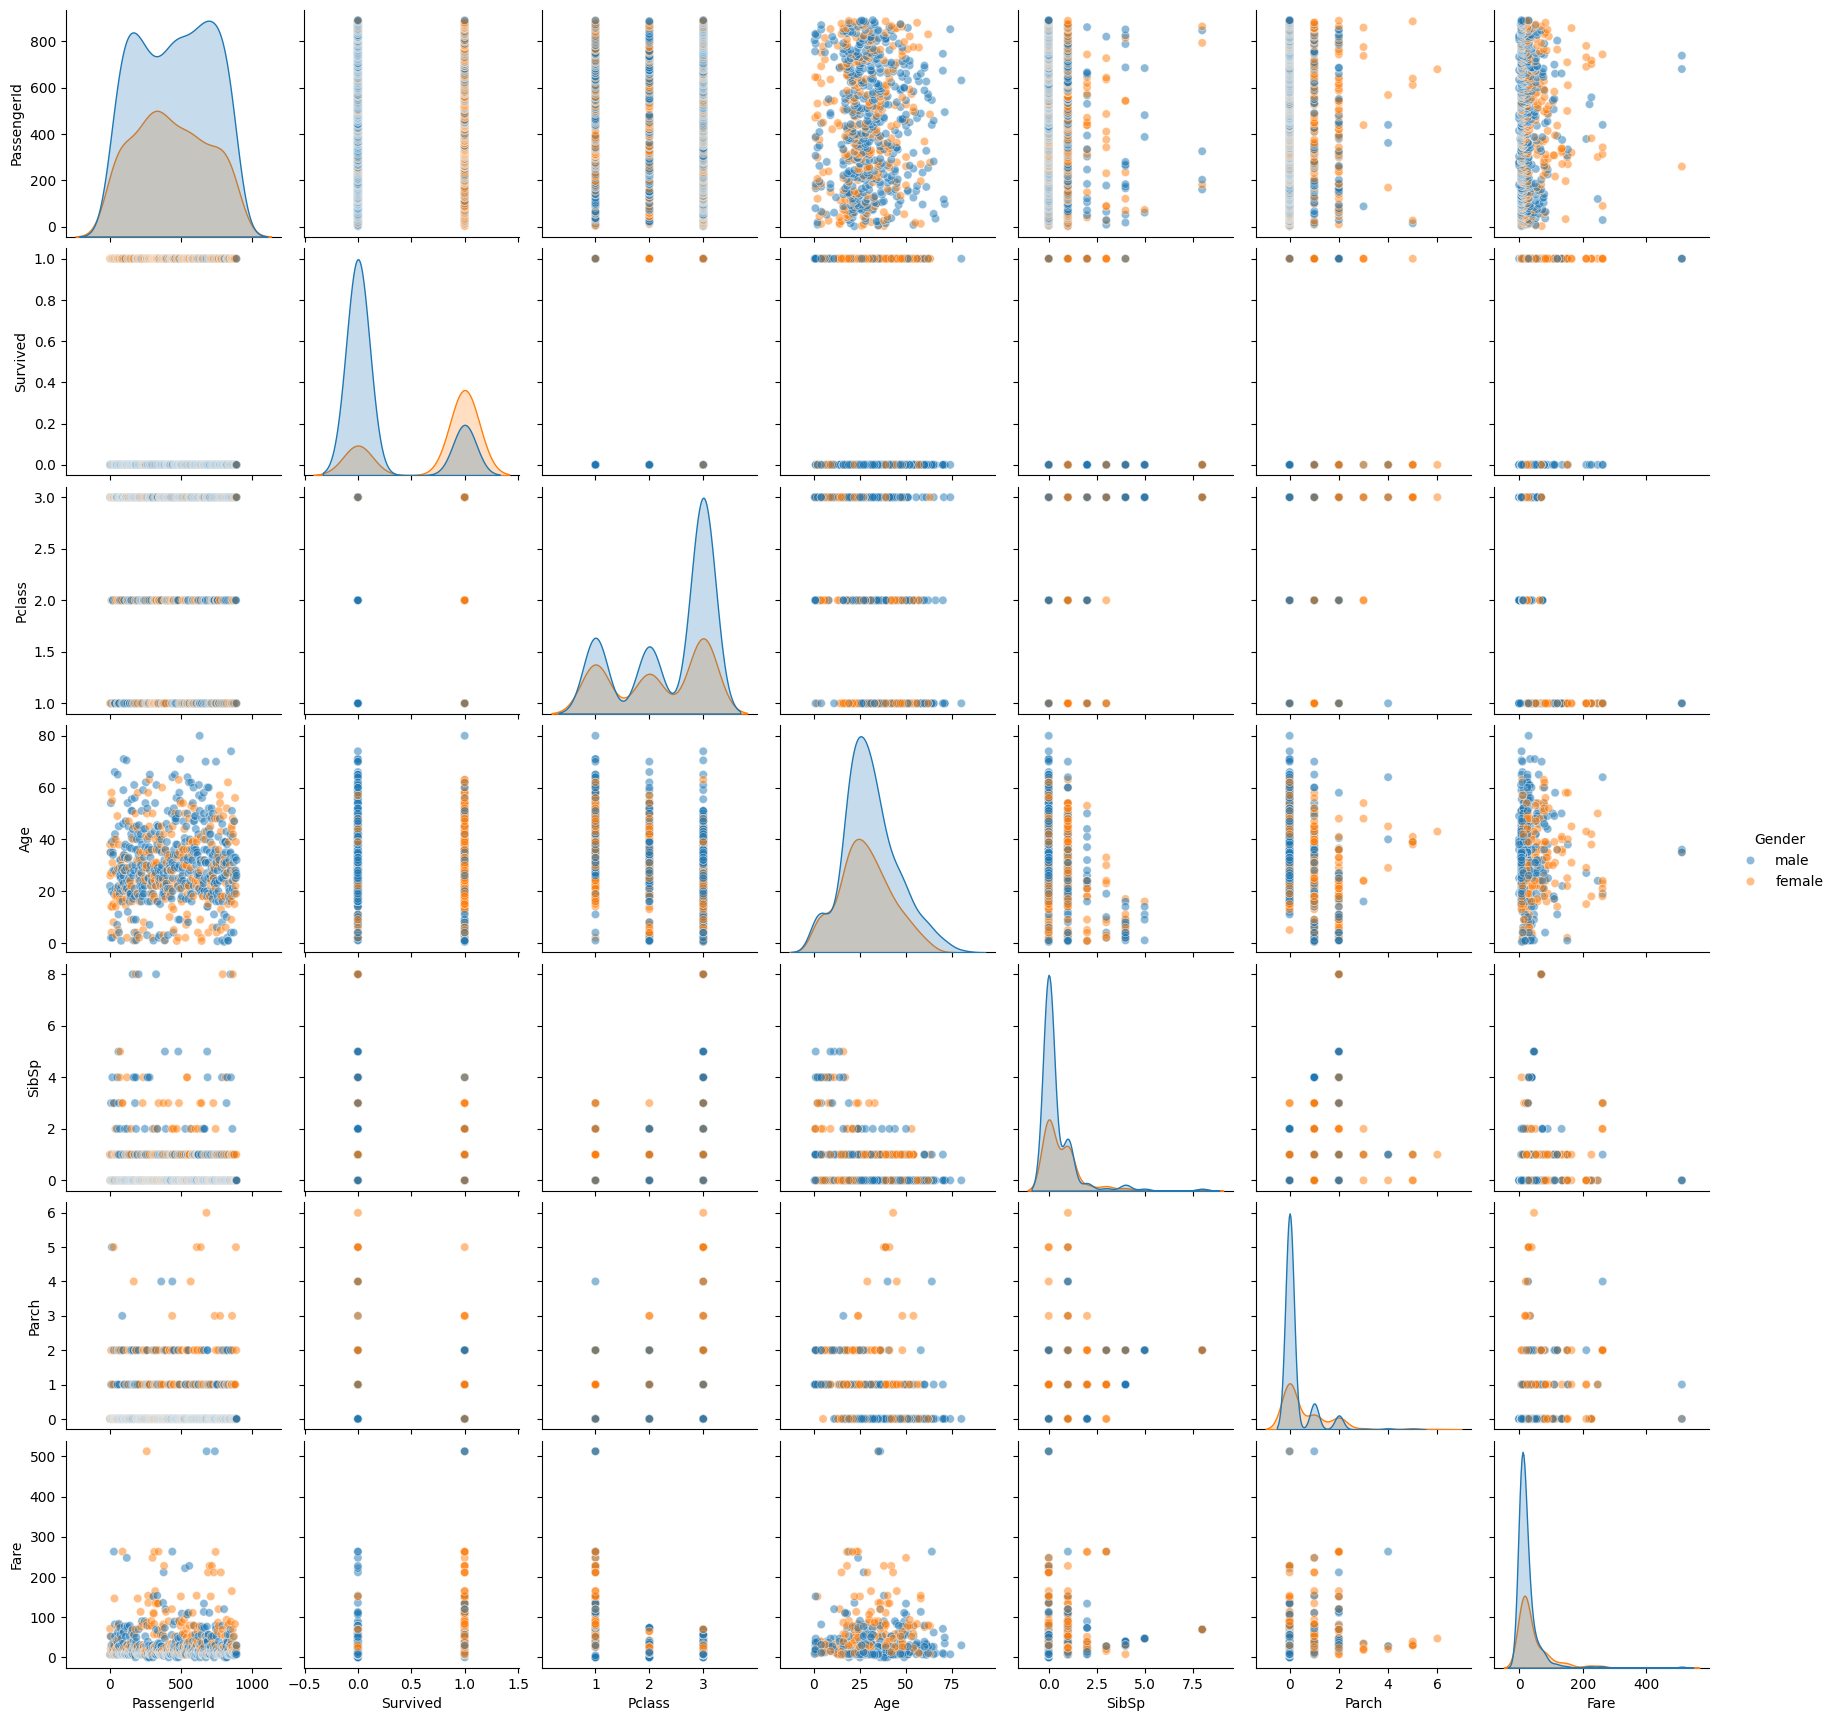

In [54]:
# 코드 7. pair plot 생성(gender에 따라 그룹을 나눔)
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.5}, hue='Gender')

<Axes: >

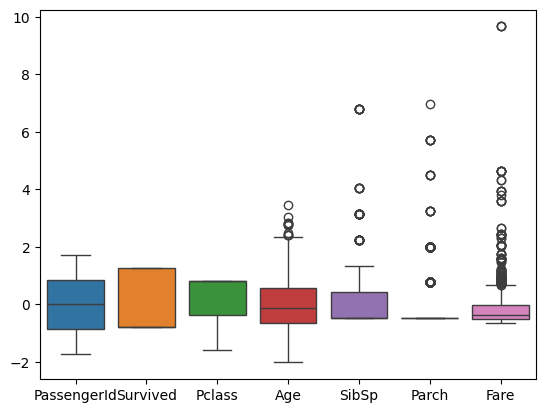

In [55]:
# 코드 8. 수치형 데이터를 표준화하여 박스 플롯 생성
# 수치형 데이터만 선택하여 표준화 (Z-score Scaling)
df_numeric = df.select_dtypes(include=['number'])
df_scaled = (df_numeric - df_numeric.mean()) / df_numeric.std()

# 박스 플롯 생성
sns.boxplot(data=df_scaled)

Gender
male      577
female    314
Name: count, dtype: int64


<Axes: ylabel='count'>

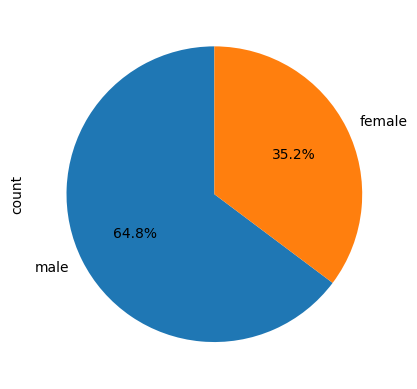

In [56]:
# 코드 9. 남, 녀 숫자 확인하고 시각화
print(df['Gender'].value_counts())
df['Gender'].value_counts().plot(kind='pie', autopct='%.1f%%', startangle=90)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


<Axes: ylabel='Pclass'>

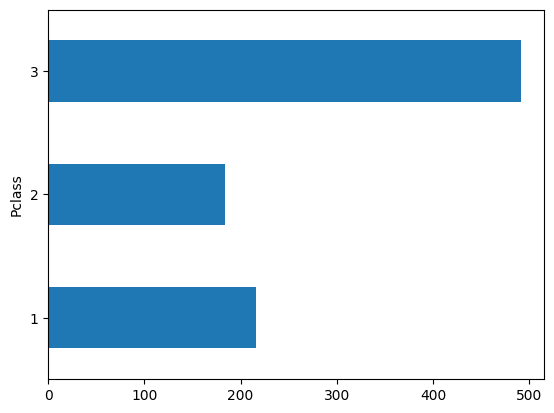

In [57]:
# 코드 10. 객실 등급에 따른 인원수 확인하고 시각화
print(df['Pclass'].value_counts())
df['Pclass'].value_counts().sort_index().plot(kind='barh')

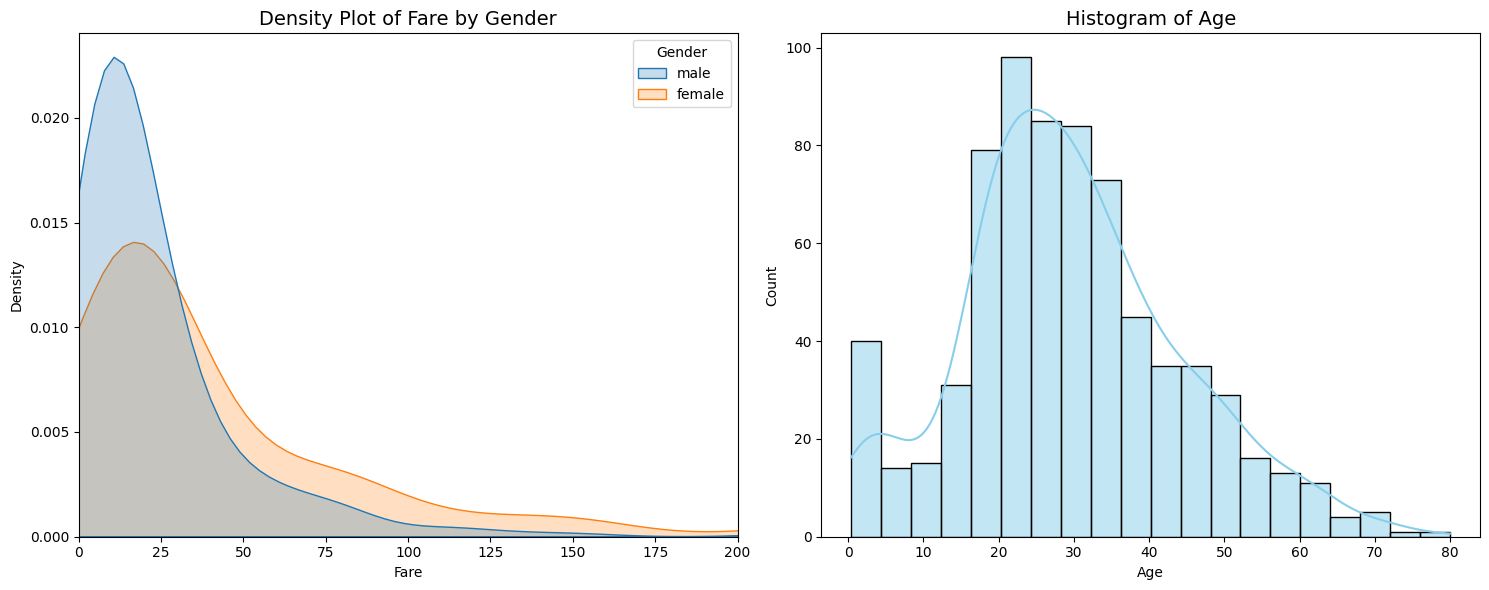

In [58]:
# 코드 11. subpllots로 1 X 2의 그래프 그리기
# 1행 2열 도화지 생성
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# [왼쪽] 성별에 따른 요금(Fare) KDE 분포
# fill=True는 곡선 아래 영역에 색을 채우고
# common_norm=False는 각 그룹의 합계를 1로 정규화
sns.kdeplot(
    data=df, x='Fare', hue='Gender', fill=True, common_norm=False, ax=ax[0]
)
ax[0].set_title('Density Plot of Fare by Gender', fontsize=14)
ax[0].set_xlim(0, 200) # 요금의 이상치 때문에 범위를 제한하여 가독성 확보

# [오른쪽] 나이(Age) 분포 히스토 그램
sns.histplot(data=df, x='Age', kde=True, color='skyblue', ax=ax[1])
ax[1].set_title('Histogram of Age', fontsize=14)

# 전체 레이아웃 보정
plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

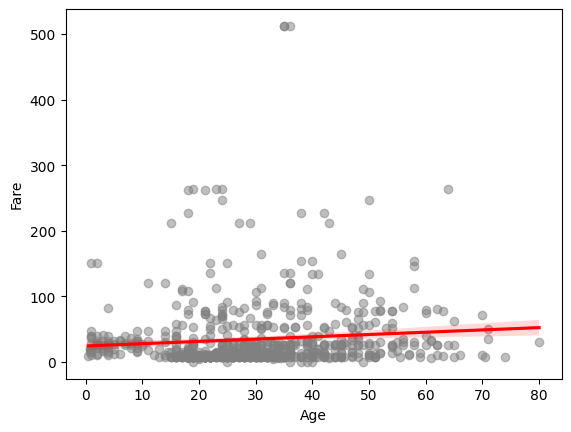

In [59]:
# 코드 12.Age와 Fare로 scatterplot을 그리고 추세선 그리기
sns.regplot(
    data=df, x='Age', y='Fare',
    scatter_kws={'alpha':0.5, 'color':'gray'}, # 점의 투명도와 색상
    line_kws={'color':'red'}
)

4. 생존 데이터 분석 및 시각화

In [60]:
# 코드 13. 남자와 여자, 15세 이하의 어린이의 생존률을 피벗 테이블로 구하기
cond1 = df['Gender'] == 'male' # 남성 구분 조건문
cond2 = df['Age'] <= 15 # 아이 구분 조건문

df_result = df.groupby('Pclass').agg(
    count=('Survived', 'count'),
    total=('Survived', 'mean'),
    male=('Survived', lambda x: x.where(cond1).mean()),
    female=('Survived', lambda x: x.where(~cond1).mean()),
    child=('Survived', lambda x: x.where(cond2).mean())
)
df_result

,count,total,male,female,child
Pclass,,,,,
1,216,0.630,0.369,0.968,0.833
2,184,0.473,0.157,0.921,1.000
3,491,0.242,0.135,0.500,0.431


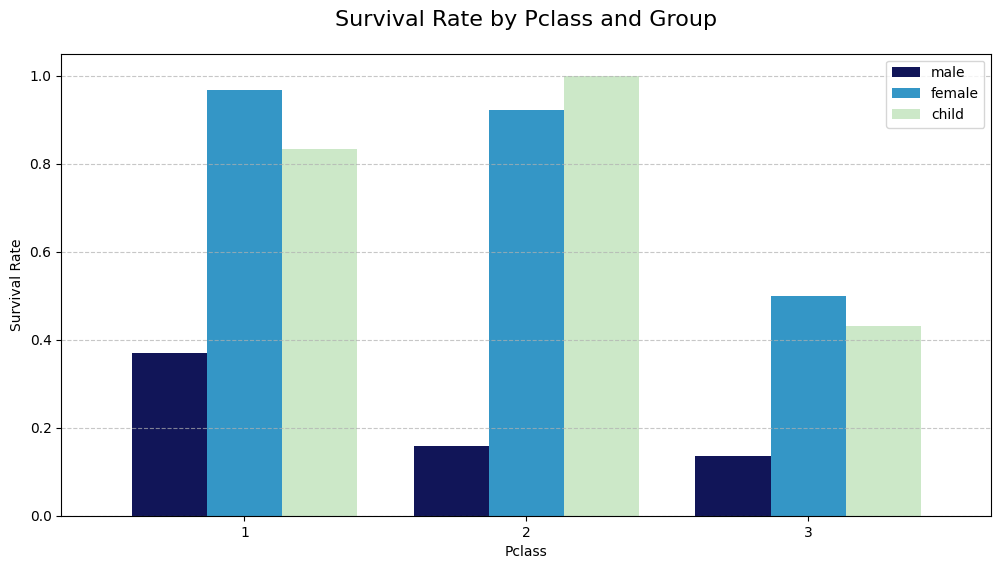

In [61]:
# 코드 14. 시각화를 위해 인원수 컬럼 제외 및 데이터 재구성
plot_df = df_result[['male', 'female', 'child']]
color = ['#111558', '#3496c6', '#cce8c8']

# Pandas plot을 이용한 그룹 막대 그래프
plot_df.plot(kind='bar', figsize=(12, 6), rot=0, width=0.8, color=color)

plt.title('Survival Rate by Pclass and Group', fontsize=16, pad=20)
plt.ylabel('Survival Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4. 결론

## 🏁 결론: 데이터로 확인한 그날의 기록

타이타닉 데이터를 통해 우리는 단순한 수치 이상의 사회적 단면과 비극적 실상을 확인할 수 있었습니다. 이번 탐색적 데이터 분석(EDA)의 주요 결론은 다음과 같습니다.

### 1. "여성과 아이를 먼저(Women and Children First)"
성별과 생존율 간의 관계를 분석한 결과, **여성의 생존율이 남성에 비해 압도적으로 높았음**을 확인했습니다. 이는 "여성과 아이를 먼저 구한다"는 당시의 구조 원칙과 사회적 관습이 실제 긴박한 상황 속에서도 데이터로 기록될 만큼 강력하게 작용했음을 보여줍니다.

### 2. 객실 등급에 따른 생존 불균형
사회적 계급의 척도인 **객실 등급(Pclass)**은 생존을 결정짓는 또 다른 핵심 요인이었습니다.
* **1등석 승객**은 가장 높은 생존 확률을 보인 반면,
* **3등석 승객**은 구조 과정에서 소외되거나 구명정에 접근하기 어려운 환경에 놓여 가장 낮은 생존율을 기록했습니다.

### 3. 경제적 가치와 안전의 상관관계
티켓 요금(**Fare**) 데이터는 객실 등급과 밀접하게 연동되었습니다.
* 더 높은 비용을 지불한 승객일수록 안전한 상층부 객실에 배치되었고, 이는 구명정 탑승 기회로 직결되었습니다.
* 결과적으로 **경제적 여유가 곧 생존을 위한 안전 자산**이 되었던 냉혹한 현실을 데이터를 통해 확인할 수 있었습니다.

---

### 💡 최종 인사이트
타이타닉의 비극은 자연재해였으나, 그 속에서 나타난 생존의 차별은 철저히 사회적 구조에 기반했습니다. **'성별'**이라는 도덕적 가치와 **'경제적 지위'**라는 현실적 가치가 교차하며 1,500여 명의 운명을 갈랐음을 이번 EDA를 통해 증명하였습니다.